<a href="https://colab.research.google.com/github/jojosam90/ltsm/blob/main/Multivariate%20Time%20Series%20Modeling%20using%20LSTM_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [366]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import datetime
import numpy as np
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [367]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv')

In [368]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [369]:
# df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d %H:%M:%S') 
# df['End Date'] = pd.to_datetime(df['End Date'], format='%Y-%m-%d %H:%M:%S')

In [370]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StartDateTime  5081 non-null   object 
 1   Total kWh      5081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.5+ KB


In [372]:
check_nan_in_df = df.isnull()
print (check_nan_in_df)

      StartDateTime  Total kWh
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
...             ...        ...
5076          False      False
5077          False      False
5078          False      False
5079          False      False
5080          False      False

[5081 rows x 2 columns]


In [373]:
df1 = df.dropna()

In [374]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [375]:
# df1['StartDateTime'] = pd.to_datetime(df1['Start Date'].astype(str) + ' ' +df1['Start Time'].astype(str))

In [376]:
# df1['EndDateTime'] = pd.to_datetime(df1['End Date'].astype(str) + ' ' +df1['End Time'].astype(str))

In [377]:
# df1 = df1.drop(columns=['_id','CP ID','Start Date', 'Start Time','End Date','End Time'])
# df1=df1[['StartDateTime','EndDateTime','Connector','Site','Model','Total kWh']]
# df1

In [378]:
# df1['Duration'] = df1['EndDateTime'] - df1['StartDateTime']
# df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'h')

In [379]:
# #df1 = df1.drop(columns=['StartDateTime','EndDateTime'])
# df1 = df1.drop(columns=['EndDateTime','Duration','Site','Model'])
df1=df1[['StartDateTime','Total kWh']]
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [380]:
# delete duplicate rows
df1 = df1.drop_duplicates()

In [381]:
df1["StartDateTime"] = pd.to_datetime(df1["StartDateTime"])

df1 = df1.sort_values(by="StartDateTime")

In [382]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [383]:
#df1[~(df1 == 0).all(axis=1)]

#make sure every hour is in the datetime
#df1 = df1.set_index("StartDateTime").resample("1h").last()
#df1 = df1.set_index("StartDateTime").resample("1h").sum()
df1 = df1.set_index("StartDateTime").resample("15min").sum()


df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:15:00,0.00
2016-01-09 07:30:00,0.00
2016-01-09 07:45:00,0.00
2016-01-09 08:00:00,10.38
...,...
2017-12-08 22:00:00,19.70
2017-12-08 22:15:00,0.00
2017-12-08 22:30:00,0.00


In [384]:
df1.dropna(subset=['Total kWh'], how='all', inplace=True)

In [385]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:15:00,0.00
2016-01-09 07:30:00,0.00
2016-01-09 07:45:00,0.00
2016-01-09 08:00:00,10.38
...,...
2017-12-08 22:00:00,19.70
2017-12-08 22:15:00,0.00
2017-12-08 22:30:00,0.00


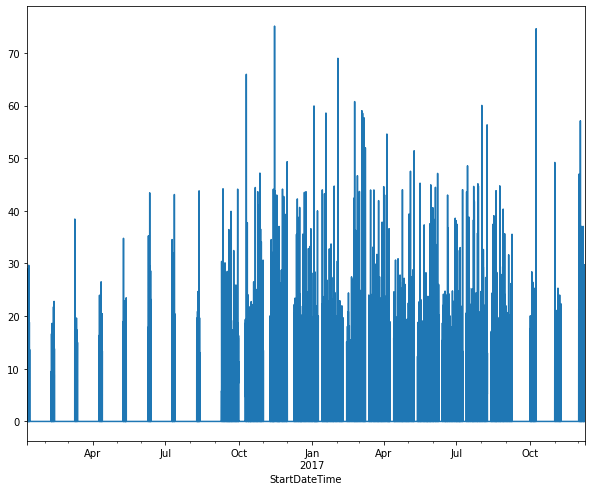

In [386]:
temp = df1['Total kWh']
temp.plot()

In [387]:
#df1 = df1[~(df1 == 0).all(axis=1)]

In [388]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:15:00,0.00
2016-01-09 07:30:00,0.00
2016-01-09 07:45:00,0.00
2016-01-09 08:00:00,10.38
...,...
2017-12-08 22:00:00,19.70
2017-12-08 22:15:00,0.00
2017-12-08 22:30:00,0.00


In [389]:
df1['Total kWh'].round(3)

StartDateTime
2016-01-09 07:00:00     3.87
2016-01-09 07:15:00     0.00
2016-01-09 07:30:00     0.00
2016-01-09 07:45:00     0.00
2016-01-09 08:00:00    10.38
                       ...  
2017-12-08 22:00:00    19.70
2017-12-08 22:15:00     0.00
2017-12-08 22:30:00     0.00
2017-12-08 22:45:00     0.00
2017-12-08 23:00:00     1.74
Freq: 15T, Name: Total kWh, Length: 67169, dtype: float64

In [390]:
#df1.to_csv("/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv")

In [391]:
def df1_to_X_y(df1, window_size=5):
  df1_as_np = df1.to_numpy()
  X= []
  y= []
  for i in range(len(df1_as_np)- window_size):
     row = [[a] for a in df1_as_np[i:i+5]]
     X.append(row) 
     label = df1_as_np[i+5]
     y.append(label) 
  return np.array(X), np.array(y)

In [392]:
WINDOW_SIZE = 5
X,y = df1_to_X_y(temp,WINDOW_SIZE)
X.shape, y.shape

((67164, 5, 1), (67164,))

In [393]:
X_train, y_train = X[:6000], y[:6000]
X_val, y_val = X[6000:6500],y[6000:6500]
X_test, y_test = X[6500:],y[6500:]
X_train.shape , y_train.shape, X_val.shape, X_test.shape, y_test.shape

((6000, 5, 1), (6000,), (500, 5, 1), (60664, 5, 1), (60664,))

In [394]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam

# model1 = Sequential()
# model1.add(InputLayer((5, 1)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

# model1.summary()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64,return_sequences = True))
model1.add(LSTM(32,return_sequences = True))
model1.add(LSTM(16))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 5, 64)             16896     
                                                                 
 lstm_31 (LSTM)              (None, 5, 32)             12416     
                                                                 
 lstm_32 (LSTM)              (None, 16)                3136      
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32,593
Trainable params: 32,593
Non-trainable params: 0
_________________________________________________________________


In [395]:
#model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [396]:
#model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, callbacks=[cp1])

Epoch 1/25
181/188 [===========================>..] - ETA: 0s - loss: 3.4595 - root_mean_squared_error: 1.8600

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 17s 69ms/step - loss: 3.3925 - root_mean_squared_error: 1.8419 - val_loss: 1.4181 - val_root_mean_squared_error: 1.1909
Epoch 2/25
182/188 [============================>.] - ETA: 0s - loss: 3.4124 - root_mean_squared_error: 1.8473

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 3.3150 - root_mean_squared_error: 1.8207 - val_loss: 1.3414 - val_root_mean_squared_error: 1.1582
Epoch 3/25
182/188 [============================>.] - ETA: 0s - loss: 2.9869 - root_mean_squared_error: 1.7283

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 3.1265 - root_mean_squared_error: 1.7682 - val_loss: 1.2650 - val_root_mean_squared_error: 1.1247
Epoch 4/25
184/188 [============================>.] - ETA: 0s - loss: 3.0583 - root_mean_squared_error: 1.7488

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 15s 80ms/step - loss: 3.0220 - root_mean_squared_error: 1.7384 - val_loss: 1.2260 - val_root_mean_squared_error: 1.1073
Epoch 5/25
186/188 [============================>.] - ETA: 0s - loss: 2.9954 - root_mean_squared_error: 1.7307

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.9723 - root_mean_squared_error: 1.7240 - val_loss: 1.2119 - val_root_mean_squared_error: 1.1009
Epoch 6/25
186/188 [============================>.] - ETA: 0s - loss: 2.9590 - root_mean_squared_error: 1.7202

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.9432 - root_mean_squared_error: 1.7156 - val_loss: 1.2046 - val_root_mean_squared_error: 1.0975
Epoch 7/25
183/188 [============================>.] - ETA: 0s - loss: 2.8830 - root_mean_squared_error: 1.6979

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.9213 - root_mean_squared_error: 1.7092 - val_loss: 1.2000 - val_root_mean_squared_error: 1.0955
Epoch 8/25
183/188 [============================>.] - ETA: 0s - loss: 2.8945 - root_mean_squared_error: 1.7013

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 63ms/step - loss: 2.9003 - root_mean_squared_error: 1.7030 - val_loss: 1.1977 - val_root_mean_squared_error: 1.0944
Epoch 9/25
183/188 [============================>.] - ETA: 0s - loss: 2.9296 - root_mean_squared_error: 1.7116

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.8808 - root_mean_squared_error: 1.6973 - val_loss: 1.1946 - val_root_mean_squared_error: 1.0930
Epoch 10/25
187/188 [============================>.] - ETA: 0s - loss: 2.8693 - root_mean_squared_error: 1.6939

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 65ms/step - loss: 2.8617 - root_mean_squared_error: 1.6916 - val_loss: 1.1899 - val_root_mean_squared_error: 1.0908
Epoch 11/25
188/188 [==============================] - ETA: 0s - loss: 2.8442 - root_mean_squared_error: 1.6865

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.8442 - root_mean_squared_error: 1.6865 - val_loss: 1.1876 - val_root_mean_squared_error: 1.0898
Epoch 12/25
188/188 [==============================] - 1s 7ms/step - loss: 2.8277 - root_mean_squared_error: 1.6816 - val_loss: 1.1886 - val_root_mean_squared_error: 1.0902
Epoch 13/25
188/188 [==============================] - ETA: 0s - loss: 2.8124 - root_mean_squared_error: 1.6770

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.8124 - root_mean_squared_error: 1.6770 - val_loss: 1.1869 - val_root_mean_squared_error: 1.0894
Epoch 14/25
188/188 [==============================] - 1s 7ms/step - loss: 2.7968 - root_mean_squared_error: 1.6724 - val_loss: 1.1935 - val_root_mean_squared_error: 1.0925
Epoch 15/25
188/188 [==============================] - 1s 7ms/step - loss: 2.7799 - root_mean_squared_error: 1.6673 - val_loss: 1.1948 - val_root_mean_squared_error: 1.0931
Epoch 16/25
188/188 [==============================] - 1s 7ms/step - loss: 2.7604 - root_mean_squared_error: 1.6615 - val_loss: 1.2078 - val_root_mean_squared_error: 1.0990
Epoch 17/25
188/188 [==============================] - 1s 7ms/step - loss: 2.7360 - root_mean_squared_error: 1.6541 - val_loss: 1.2097 - val_root_mean_squared_error: 1.0998
Epoch 18/25
188/188 [==============================] - 1s 7ms/step - loss: 2.7142 - root_mean_squared_error: 1.6475 - val_loss: 1.2164 - val_root

In [397]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,3.583875,0.00
1,0.182303,0.00
2,0.139539,0.00
3,3.537405,3.58
4,3.584831,0.00
...,...,...
5995,3.528260,16.06
5996,3.584142,0.00
5997,0.187282,0.00
5998,-0.079490,0.00


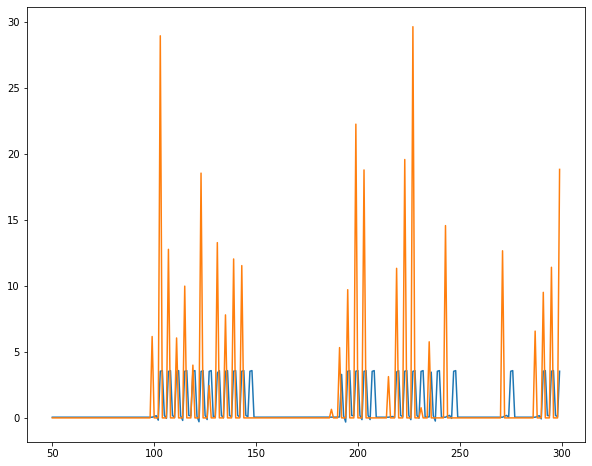

In [398]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:300])
plt.plot(train_results['Actuals'][50:300])

In [399]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,3.584212,0.0
1,0.187576,0.0
2,-0.105375,0.0
3,3.528433,0.0
4,3.584297,0.0
...,...,...
495,0.051187,0.0
496,0.051187,0.0
497,0.051187,0.0
498,0.051187,0.0


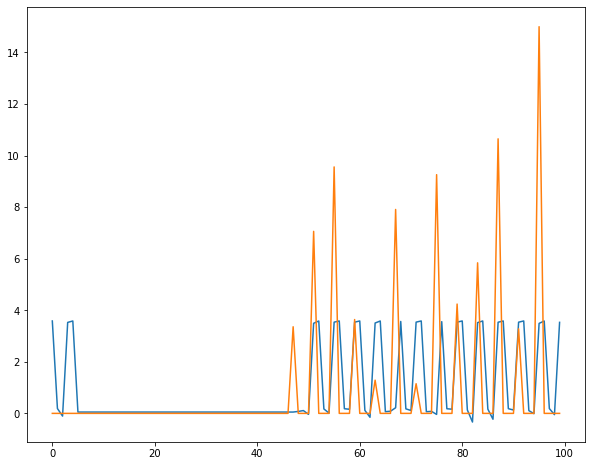

In [400]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [401]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,0.051187,0.00
1,0.051187,0.00
2,0.051187,0.00
3,0.051187,0.00
4,0.051187,0.00
...,...,...
60659,3.533731,19.70
60660,3.584408,0.00
60661,0.187711,0.00
60662,-0.132809,0.00


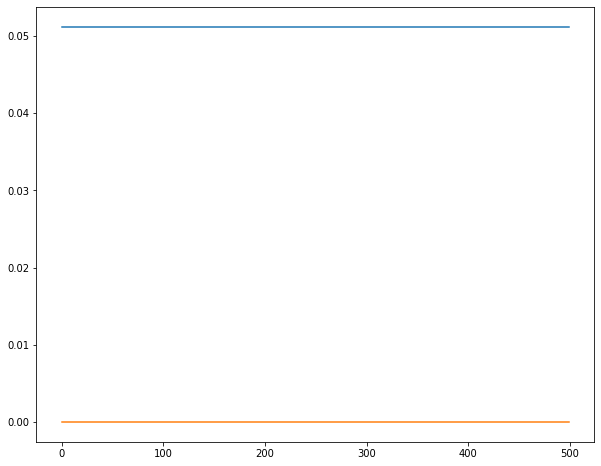

In [402]:
plt.plot(test_results['Test Predictions'][:500])  # blue
plt.plot(test_results['Actuals'][:500]) #red

In [403]:
import xgboost as xgb

#model1 = xgb.XGBRegressor()
#model1.fit(X_train,y_train)

In [404]:
model1.score(X_train, y_train)

AttributeError: ignored

In [ ]:
model1.score(X_test,y_test)